In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Fashion-MNIST dataset

In [6]:
# Training dataset
df = pd.read_csv(r"H:\Git\DL-Data-Sets\fashion-mnist_train.csv")

# Testing dataset
df_test = pd.read_csv(r"H:\Git\DL-Data-Sets\fashion-mnist_test.csv")

In [7]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


| Label | Category       |
|-------|--------------|
| 0     | T-shirt/top  |
| 1     | Trouser      |
| 2     | Pullover     |
| 3     | Dress        |
| 4     | Coat         |
| 5     | Sandal       |
| 6     | Shirt        |
| 7     | Sneaker      |
| 8     | Bag          |
| 9     | Ankle boot   |


# Mapping integer labels to their respective fashion categories

In [8]:
fashion_mnist_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# Visualizing a sample image from the dataset

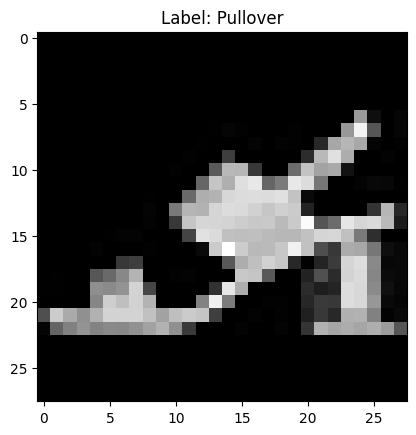

In [12]:
image = df.iloc[50, 1:].to_numpy().reshape(28, 28) # Reshape into 28x28 pixels
image_label = fashion_mnist_labels[df.iloc[0, 0]]

plt.imshow(image, cmap='gray')
plt.title(f"Label: {image_label}")
plt.show()

In [13]:
# Normalize pixel values from range (0-255) to (0-1) for better training performance
X = df.iloc[:, 1:] / 255.0
y = df.iloc[:, 0]

X_test = df_test.iloc[:, 1:] / 255.0
y_test = df_test.iloc[:, 0]

In [14]:
# Reshape data to fit CNN model (adding channel dimension)
X = X.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

# Encode labels using LabelEncoder

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y_test = label_encoder.transform(y_test)

In [16]:
from sklearn.model_selection import train_test_split

# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Display dataset shapes
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("===================================")
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (38400, 28, 28, 1)
X_val shape: (9600, 28, 28, 1)
X_test shape: (12000, 28, 28, 1)
y_train shape: (38400,)
y_val shape: (9600,)
y_test shape: (12000,)


# Define CNN model

In [17]:
import tensorflow as tf

In [18]:
# Define CNN model

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25),


    tf.keras.layers.Flatten(),
    # tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

c:\Users\User\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile model

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model

In [20]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 52s 40ms/step - accuracy: 0.6835 - loss: 0.9394 - val_accuracy: 0.8636 - val_loss: 0.3686
Epoch 2/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.8398 - loss: 0.4449 - val_accuracy: 0.8774 - val_loss: 0.3458
Epoch 3/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.8618 - loss: 0.3843 - val_accuracy: 0.8914 - val_loss: 0.3020
Epoch 4/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.8762 - loss: 0.3469 - val_accuracy: 0.8940 - val_loss: 0.2959
Epoch 5/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.8788 - loss: 0.3325 - val_accuracy: 0.9026 - val_loss: 0.2783
Epoch 6/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 43s 36ms/step - accuracy: 0.8939 - loss: 0.2976 - val_accuracy: 0.9033 - val_loss: 0.2592
Epoch 7/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 43s 36ms/step - accuracy: 0.8938 - loss: 0.2889 - val_accuracy: 0.9002 - val_loss: 0.2763
Epoch 8/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 43s 36ms/step - accuracy: 0.9016 -

# Evaluate on test set

In [21]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9311 - loss: 0.2082
Test accuracy: 0.9291666746139526


# Plot training and validation accuracy

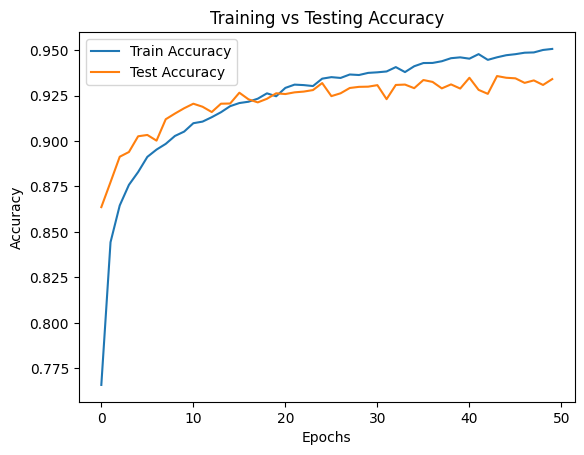

In [22]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Testing Accuracy')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


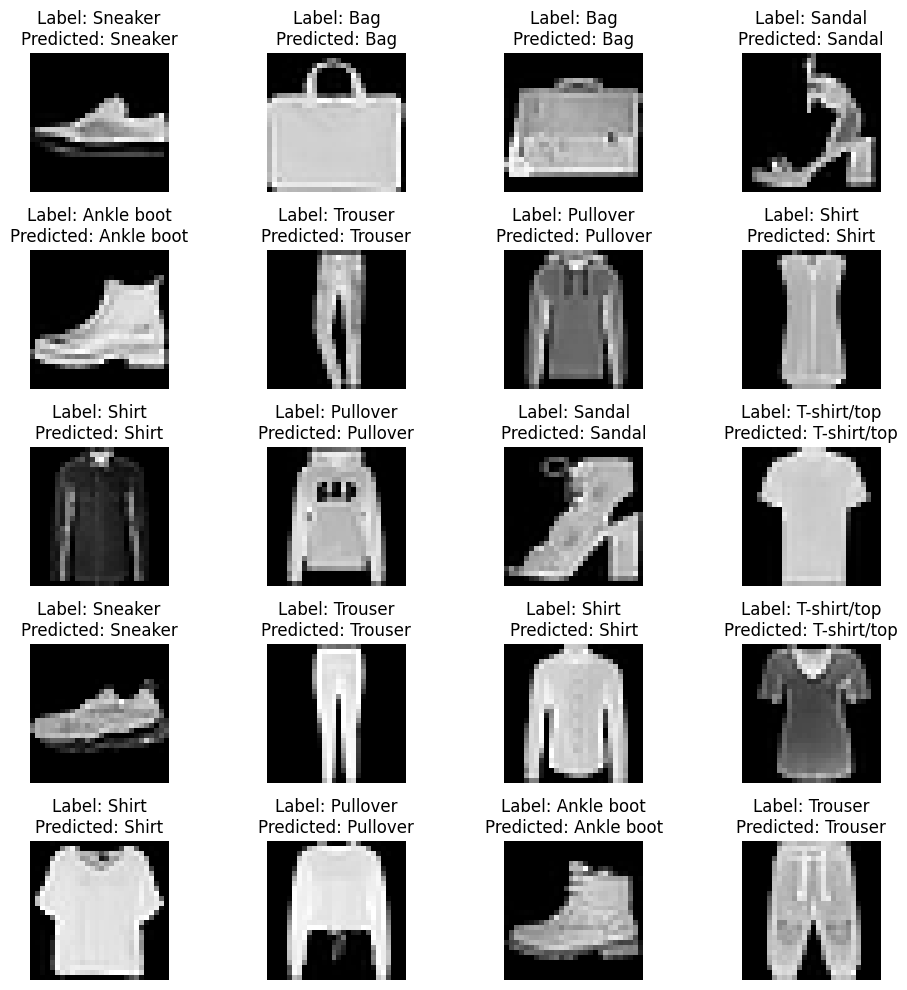

In [25]:
n_samples = 20
plt.figure(figsize=(10, 10))
for i in range(n_samples):
    plt.subplot(5, 4, i+1)
    image = X_test[i]
    image_label = fashion_mnist_labels[y_test[i]]
    prediction = model.predict(image.reshape(1, 28, 28, 1))
    predicted_label = fashion_mnist_labels[np.argmax(prediction)]

    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f"Label: {image_label}\nPredicted: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

**Note:** Although the model achieved high accuracy during training, it made some mistakes on a few test images, suggesting it may be slightly overfitting. Techniques such as **data augmentation** and **regularization** will be applied to improve performance and reduce errors.


# 1️⃣Data Augmentation to generalize the model

In [26]:
# Helps the model learn more general patterns instead of memorizing the dataset.
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

datagen.fit(X_train)

# 2️⃣Reduce learning rate

In [27]:
# Reduce learning rate dynamically to improve generalization

learning_rate = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=0.5, min_lr=1e-6)

# 3️⃣L2 Regularization

In [28]:
# L2 Regularization Helps reduce overfitting by penalizing large weights

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.25), # Icrease Dropout


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),# Icrease Dropout
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model

In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model with augmented data

use batch size `64` with the data generation and learning rate

In [21]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=50, validation_data=(X_val, y_val), callbacks=[learning_rate])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


600/600 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.6737 - loss: 1.2853 - val_accuracy: 0.7446 - val_loss: 0.7789 - learning_rate: 0.0010
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.7861 - loss: 0.6328 - val_accuracy: 0.8301 - val_loss: 0.5204 - learning_rate: 0.0010
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8029 - loss: 0.5783 - val_accuracy: 0.8609 - val_loss: 0.4338 - learning_rate: 0.0010
Epoch 4/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.8129 - loss: 0.5447 - val_accuracy: 0.8694 - val_loss: 0.4002 - learning_rate: 0.0010
Epoch 5/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8258 - loss: 0.5115 - val_accuracy: 0.8772 - val_loss: 0.3867 - learning_rate: 0.0010
Epoch 6/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8322 - loss: 0.4973 - val_accuracy: 0.8845 - val_loss: 0.3655 - learning_rate: 0.0010
Epoch 7/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.8342 - loss: 0.4885

# Evaluate model

In [22]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9104 - loss: 0.2611
Test accuracy: 0.9079999923706055


# Plot accuracy

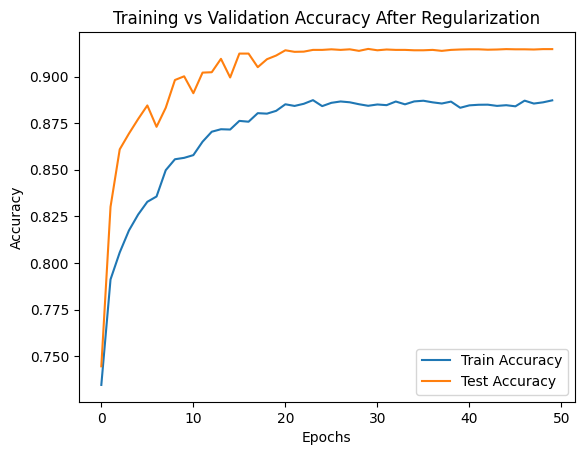

In [23]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy After Regularization')
plt.show()

# Display sample predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


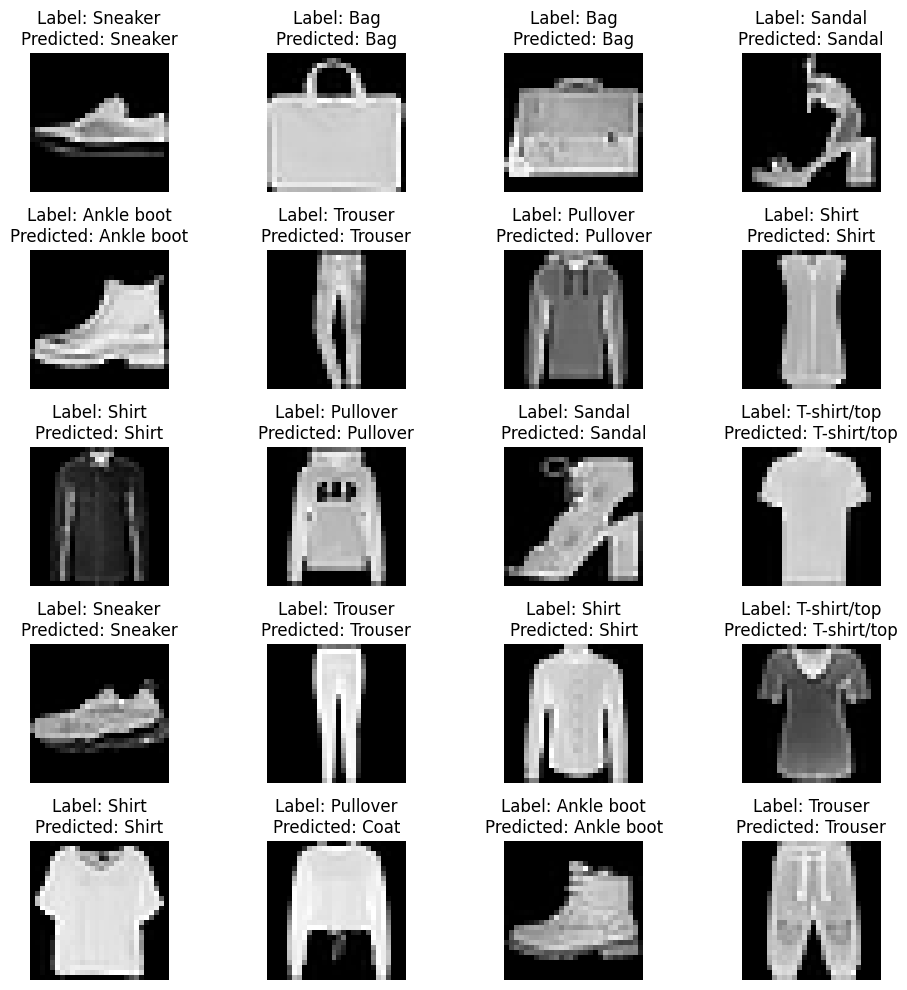

In [24]:
n_samples = 20
plt.figure(figsize=(10, 10))
for i in range(n_samples):
    plt.subplot(5, 4, i+1)
    image = X_test[i]
    image_label = fashion_mnist_labels[y_test[i]]
    prediction = model.predict(image.reshape(1, 28, 28, 1))
    predicted_label = fashion_mnist_labels[np.argmax(prediction)]

    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f"Label: {image_label}\nPredicted: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

**Result:** After applying **data augmentation** and **regularization**, the model's performance improved, correctly predicting the test images without mistakes. This indicates a reduction in overfitting and better generalization.


<center>
<pre>
  _____ _                 _        
 |_   _| |__   __ _ _ __ | | _____
   | | | '_ \ / _` | '_ \| |/ / __|
   | | | | | | (_| | | | |   <\__ \
   |_| |_| |_|\__,_|_| |_|_|\_\___/
       
</pre>
</center>